In [1]:
import tensorflow as tf  # Open-source Python library for ML
from tensorflow.python.client import device_lib # Method that enables to list the devices available in the local process 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12509772032529649412,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3135687886
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12163539955926299113
 physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Setup

In [3]:
import numpy as np # *fundamental package for scientific computing in Python. Show documentation
from tensorflow import keras
from tensorflow.keras import layers

# Prepare the data

### 1. Normalization of images: pixels take values in the new range [0,1]
### 2. Define input shape : specify 1-channel images
### 3. One-hot encoding of target values: the representation of categorical variables as binary vectors
![image.png](imgs/one_hot.png)
Ordinal variables are a good example where a label encoding (integer encoding) would be sufficient.

In categorical variables where no such ordinal relationship exists, the integer encoding is not enough. In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance.

In [4]:
# Model / data parameters
num_classes = 10 # *Show image. MNIST 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # *Show datasets and MNIST information in Keras 
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 # Pixel normalization rescales the values into a range of [0,1]
x_test = x_test.astype("float32") / 255 # Use a common scale for different features (weights update)

print("x_train shape:", x_train.shape)


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)# Given a tensor input this operation inserts a dimension of length 1 at the dimension index axis
x_test = np.expand_dims(x_test, -1)# a negative axis counts from the end so axis=-1 adds an inner most dimension #channels


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#ADDED to check the format of labels (integers from 0 to 9) before preprocessing (one hot encoding)
print(len(y_train))
print(y_train[59999])

# convert class vectors to binary class matrices             library.function
y_train = keras.utils.to_categorical(y_train, num_classes)  # *Show in Keras. Converts a class vector (integers) to binary class matrix.
y_test = keras.utils.to_categorical(y_test, num_classes) # each numerical/categorical value is represented as a binary vector

#ADDED to check the format of labels (integers from 0 to 9) after preprocessing (one hot encoding)
print(len(y_train))
print(y_train[59999])

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
60000
8
60000
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Added for image data visualization

<IPython.core.display.Javascript object>


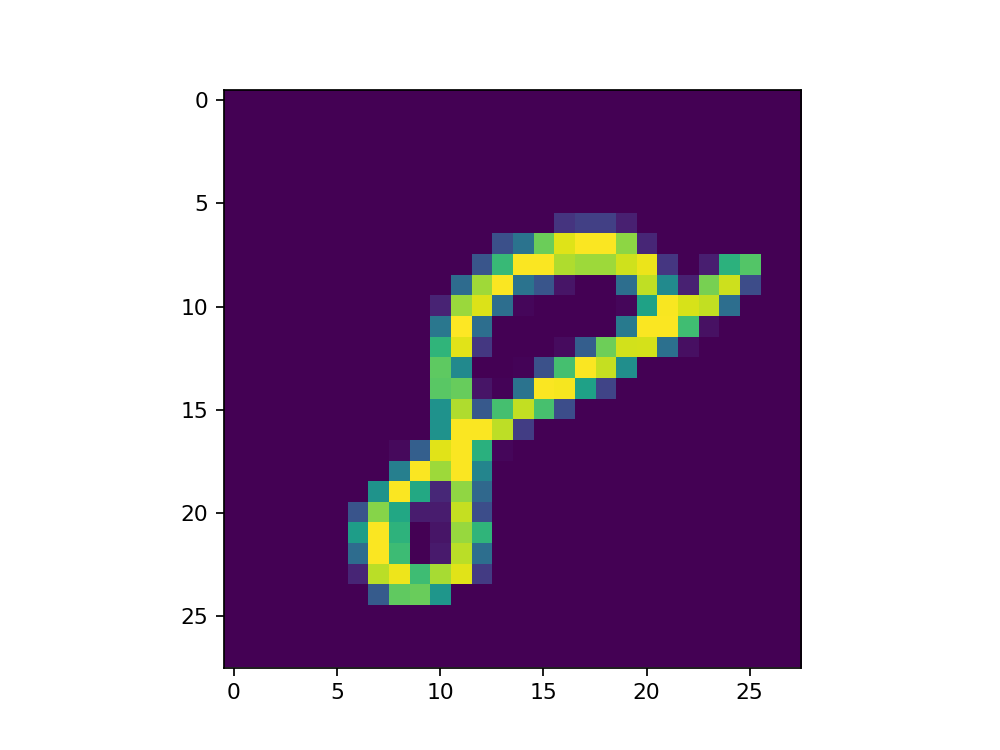

In [5]:

import matplotlib.pyplot as plt # *Show resources. For creating static, animated, and interactive visualizations in Python
#interactive data visualization
%matplotlib notebook

n=59999 #visualize random image in the training set
plt.imshow(x_train[n,:,:,0], cmap="viridis") #* default colormap 'viridis'. Show cmap="" options

![image.png](imgs/cnn.png)

# Build the model

In [6]:
model = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"), # * 2D convolution layer. Check arguments, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # rate: Float between 0 and 1. Fraction of the input units to drop.
        layers.Dense(num_classes, activation="softmax"),# * recall softmax. *Show images
    ]
)

model.summary()

#Parameters
# 832= 5x5x32+32
# 51264= 5x5x32x64+64
# 10250= 1024x10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Convolution Operation using a 3x3 kernel:
![image.png](imgs/convolution-operation.png)

## Valid padding:
![SegmentLocal](imgs/valid.gif "segment")

## Same padding:
![SegmentLocal](imgs/Same_padding.gif "segment")

## Flattening layer:

![image.png](imgs/flattening.png)

# Added for visualization of the architecture (Additional package needs to be installed)

In [7]:
# NOTE: We need to install pydot> activate the environment and run the next command in Anaconda Prompt: pip install pydot

# `rankdir='LR'` is to make the graph horizontal.Show saved image in default working directory
keras.utils.plot_model(model,show_shapes=True,rankdir='LR',to_file="Sequential_CNN_Model.png") #check the generated image saved in the folder

In [8]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
history= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # Calculates how often predictions equal labels

# Metric functions are similar to loss functions, except that the results from evaluating a metric are not used 
# when training the model but in practice any loss can be used as a metric


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3314 - accuracy: 0.8989 - val_loss: 0.0864 - val_accuracy: 0.9762
Epoch 2/15
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1004 - accuracy: 0.9684 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 3/15
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.0485 - val_accuracy: 0.9866
Epoch 4/15
48000/48000 [==============================] - 3s 59us/sample - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0411 - val_accuracy: 0.9891
Epoch 5/15
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 6/15
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0338 - val_accuracy: 0.9896
Epoch 7/15
48000/48000 [==============================]

## Losses
https://keras.io/api/losses/
## Optimizers
https://keras.io/api/optimizers/
## Metrics
https://keras.io/api/metrics/

## Data splitting
![image.png](files/imgs/MNIST.png)

![image.png](files/imgs/data.png)

## Logits, Softmax, and Loss
<img src="files/imgs/Softmax.png">
Softmax converts logits into probabilities
<img src="files/imgs/cce_loss.png">
Cross-Entropy measures the distance between the output probabilities (P) and the truth values (T)


## Loss: Categorical cross entropy (Classification)
<img src="files/imgs/CategoricalCrossentropy.png">



In [9]:
#Evaluate the model in the Test set made of 10000 images and compute average loss
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.019479156361361674
Test accuracy: 0.9931


# Visualize final weights of convolutional kernels

<IPython.core.display.Javascript object>


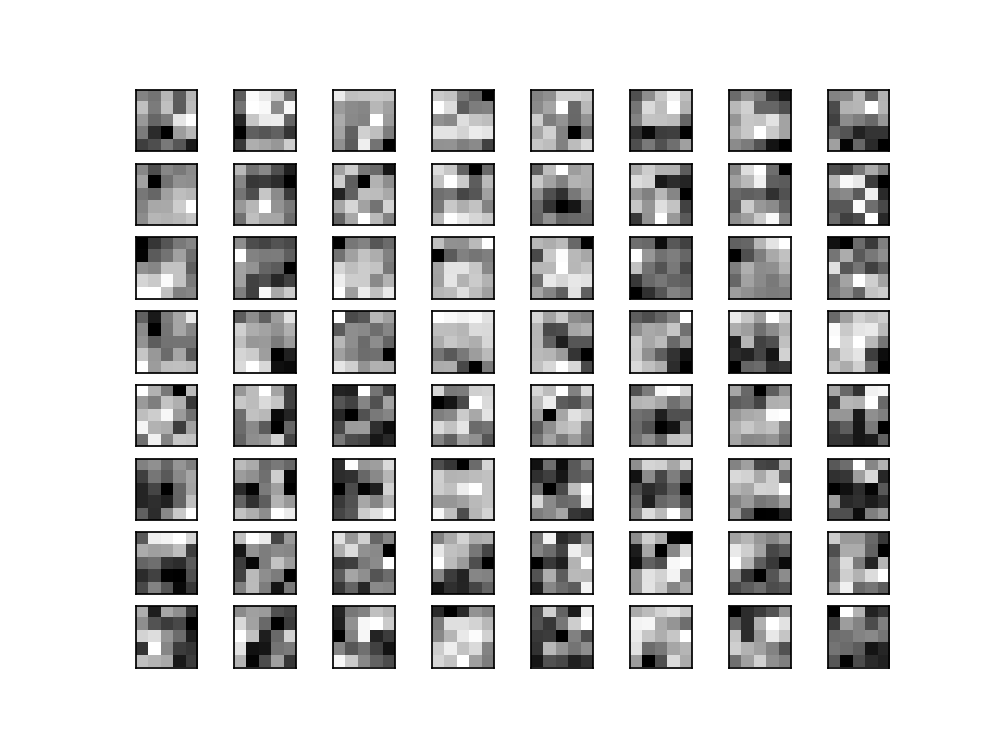

In [10]:
from matplotlib import pyplot
# retrieve weights from the second hidden layer

filters, biases = model.layers[2].get_weights()

# plot first few filters
n_filters, ix = 8, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(8):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 8, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

# Visualization of the loss evolution during training

<IPython.core.display.Javascript object>


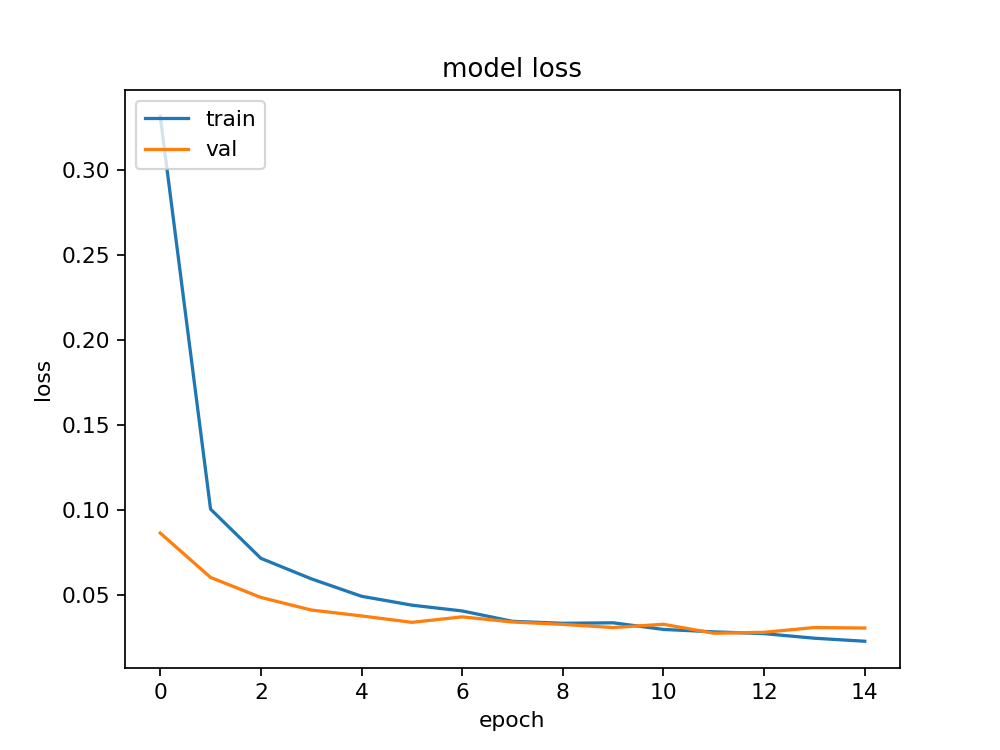

In [11]:
# summarize history for loss in training and validation sets to assess Overfitting-Underfitting
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.savefig('Loss vs Epochs.png')

#  Visualization of the classification accuracy during training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>


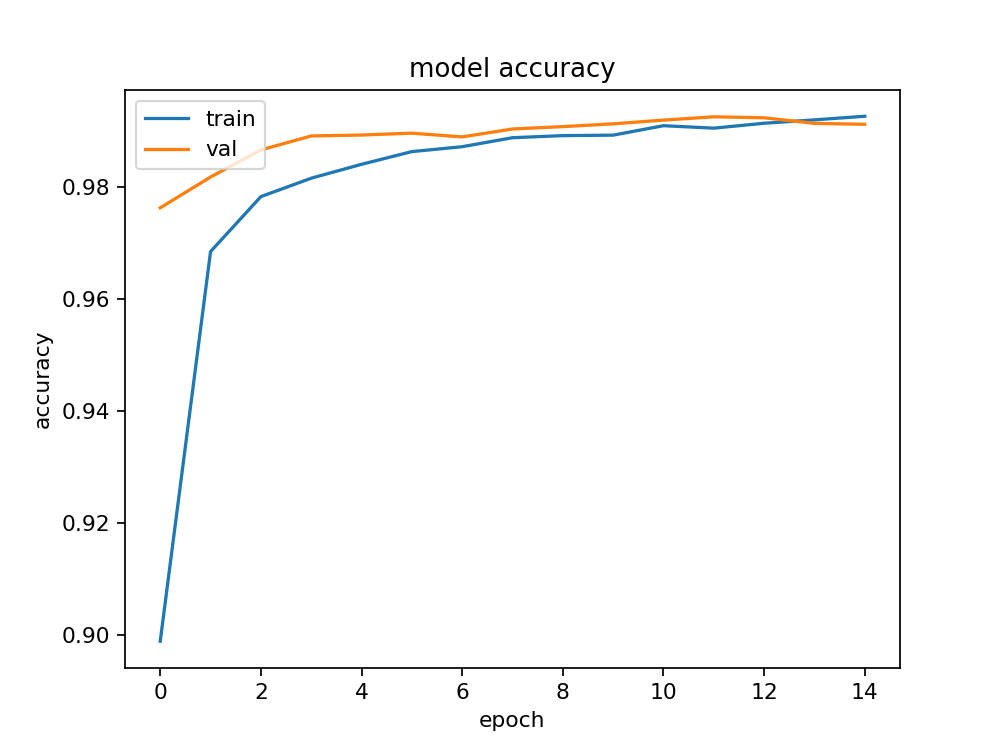

In [12]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Save and load weights 

In [13]:
#Save the weights of the just trained model in the default directory
model.save_weights('Example1.h5')
model.load_weights('Example1.h5')

# Visualize individual predictions

In [14]:
index=9999 #index of a randomly picked sample to make a prediction inside the test set (any number from 0 to 9999)
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred_i=model.predict(x_test)[index]
print("\n   Predicted: ",np.around(y_pred_i,decimals=3))


<IPython.core.display.Javascript object>


Ground-truth:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

   Predicted:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Computation of the loss for a single sample prediction
### For the batch the only difference is that the average is reported

![title](imgs/CategoricalCrossentropy.png)

In [16]:
print(y_test_i)
cce = keras.losses.CategoricalCrossentropy()
print("loss(cce) for the single prediction: ",cce(y_test_i, y_pred_i).numpy())

print("\nPredicted: ",y_pred_i)

import math
cce_manual=-math.log(y_pred_i[6])
print(y_pred_i[6])

print(cce_manual)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
loss(cce) for the single prediction:  3.9339143e-06

Predicted:  [1.03706476e-07 1.89453054e-12 3.54368950e-07 3.40861517e-09
 1.30723663e-08 3.59245860e-08 9.99996185e-01 1.12415005e-15
 3.39662392e-06 7.24955079e-12]
0.9999962
3.814704541601118e-06


# Induce underfitting 
### Model is oversimplified to have only a total of 222 parameters

In [17]:
model2 = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(1, kernel_size=(5, 5), activation="relu"), # * 2D convolution layer. Check arguments, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(1, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),# * recall softmax. *Show images
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1)           26        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 222
Trainable params: 222
Non-trainable params: 0
________________________________________________________

In [18]:
batch_size = 128
epochs = 30
# Compile model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
# Fit the model
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # Calculates how often predictions equal labels


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 33us/sample - loss: 1.8747 - accuracy: 0.3431 - val_loss: 1.0268 - val_accuracy: 0.6691
Epoch 2/30
48000/48000 [==============================] - 1s 24us/sample - loss: 0.8572 - accuracy: 0.7297 - val_loss: 0.6759 - val_accuracy: 0.7873
Epoch 3/30
48000/48000 [==============================] - 1s 23us/sample - loss: 0.6728 - accuracy: 0.7930 - val_loss: 0.5803 - val_accuracy: 0.8210
Epoch 4/30
48000/48000 [==============================] - 1s 24us/sample - loss: 0.6062 - accuracy: 0.8146 - val_loss: 0.5383 - val_accuracy: 0.8384
Epoch 5/30
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5744 - accuracy: 0.8255 - val_loss: 0.5210 - val_accuracy: 0.8412ss: 0.5789 
Epoch 6/30
48000/48000 [==============================] - 1s 24us/sample - loss: 0.5547 - accuracy: 0.8313 - val_loss: 0.5031 - val_accuracy: 0.8473
Epoch 7/30
48000/48000 [=====================

In [19]:


# summarize history for loss in training and validation sets to assess Overfitting-Underfitting
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.plot(history2.history['loss']) #
plt.plot(history2.history['val_loss'])
plt.legend(['train_original', 'val_original','train_new', 'val_new'], loc='upper left')
plt.ylim(0,1)
plt.show()
#

<IPython.core.display.Javascript object>

In [20]:
index=0 #index of a randomly picked sample to make a prediction inside the test set
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred_i=model2.predict(x_test)[index]
print("\nPredicted: ",np.around(y_pred_i,decimals=3))


<IPython.core.display.Javascript object>


Ground-truth:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predicted:  [0.001 0.    0.001 0.022 0.    0.    0.    0.976 0.    0.   ]


# Induce overfitting
## Training data will be decreased to 60 samples only (by setting split to 0.999)

In [21]:
model3 = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"), # * 2D convolution layer. Check arguments, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),# * recall softmax. *Show images
    ]
)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [22]:
batch_size = 128
epochs = 30
# Compile model
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
# Fit the model
history3 = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.999) # Calculates how often predictions equal labels


Train on 60 samples, validate on 59940 samples
Epoch 1/30
60/60 [==============================] - 2s 37ms/sample - loss: 2.3022 - accuracy: 0.1000 - val_loss: 2.2592 - val_accuracy: 0.2525
Epoch 2/30
60/60 [==============================] - 2s 29ms/sample - loss: 2.2201 - accuracy: 0.4167 - val_loss: 2.2269 - val_accuracy: 0.2348
Epoch 3/30
60/60 [==============================] - 2s 29ms/sample - loss: 2.1492 - accuracy: 0.3667 - val_loss: 2.1969 - val_accuracy: 0.2018
Epoch 4/30
60/60 [==============================] - 2s 29ms/sample - loss: 2.0814 - accuracy: 0.3167 - val_loss: 2.1655 - val_accuracy: 0.2128
Epoch 5/30
60/60 [==============================] - 2s 30ms/sample - loss: 2.0118 - accuracy: 0.3167 - val_loss: 2.1281 - val_accuracy: 0.2468
Epoch 6/30
60/60 [==============================] - 2s 29ms/sample - loss: 1.9364 - accuracy: 0.4000 - val_loss: 2.0803 - val_accuracy: 0.3203
Epoch 7/30
60/60 [==============================] - 2s 29ms/sample - loss: 1.8529 - accuracy: 0

<IPython.core.display.Javascript object>


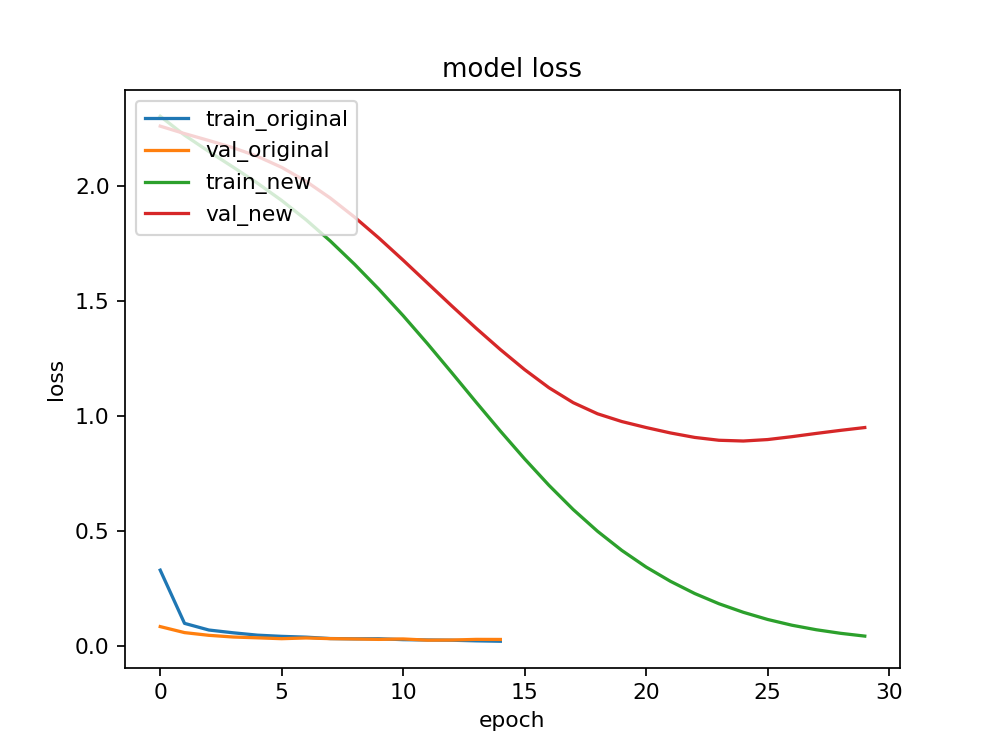

In [23]:
import matplotlib.pyplot as plt # *Show resources. For creating static, animated, and interactive visualizations in Python
#interactive data visualization
%matplotlib notebook 

# summarize history for loss in training and validation sets to assess Overfitting-Underfitting
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.plot(history3.history['loss']) #
plt.plot(history3.history['val_loss'])
plt.legend(['train_original', 'val_original','train_new', 'val_new'], loc='upper left')
plt.show()



<IPython.core.display.Javascript object>


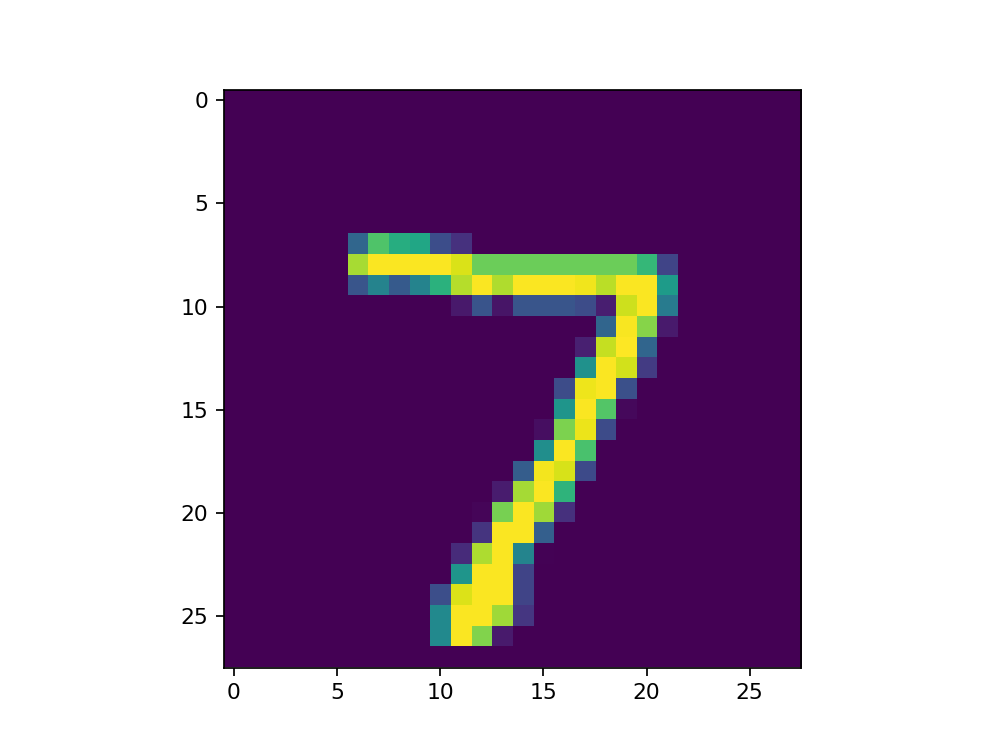


Ground-truth:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predicted:  [0.    0.    0.003 0.001 0.    0.001 0.    0.977 0.    0.019]


In [24]:
index=0 #index of a randomly picked sample to make a prediction inside the test set
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred_i=model3.predict(x_test)[index]
print("\nPredicted: ",np.around(y_pred_i,decimals=3))

# Run previous example as a Regression problem
### 1. Do not one-hot encode the labels, instead use the original numeric integer labels
### 2. Substitute output layer of neurons(num_classes) to one single output neuron and change the activation from softmax to linear
### 3. Use a different Loss: Mean Squared Error (Regression)
<img src="files/imgs/MSE.png">

In [30]:


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # *Show datasets and MNIST information in Keras 
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 # Pixel normalization rescales the values into a range of [0,1]
x_test = x_test.astype("float32") / 255 # Use a common scale for different features (weights update)

print("x_train shape:", x_train.shape)


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)# Given a tensor input this operation inserts a dimension of length 1 at the dimension index axis
x_test = np.expand_dims(x_test, -1)# a negative axis counts from the end so axis=-1 adds an inner most dimension #channels


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#ADDED to check the format of labels (integers from 0 to 9) 
print(len(y_train))
print(y_train[0])

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
60000
5


# Build a model with single output neuron and linear activation

In [35]:
model4 = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"), # * 2D convolution layer. Check arguments, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="linear"),
    ]
)

model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 53,121
Trainable params: 53,121
Non-trainable params: 0
__________________________________________________

In [36]:
batch_size = 128
epochs = 15

opt=keras.optimizers.Adam(
    learning_rate=0.005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

model4.compile(loss="mean_squared_error", optimizer=opt) # a function used to judge the performance of model
history4= model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2) # Calculates how often predictions equal labels

#Metric functions are similar to loss functions, except that the results from evaluating a metric are not used 
# when training the model but in practice any loss can be used as a metric

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 58us/sample - loss: 1.9434 - val_loss: 1.0976
Epoch 2/15
48000/48000 [==============================] - 2s 52us/sample - loss: 0.8014 - val_loss: 0.6692
Epoch 3/15
48000/48000 [==============================] - 3s 52us/sample - loss: 0.6400 - val_loss: 0.6064
Epoch 4/15
48000/48000 [==============================] - 2s 52us/sample - loss: 0.5715 - val_loss: 0.5655
Epoch 5/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.5160 - val_loss: 0.5575
Epoch 6/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.4827 - val_loss: 0.5620
Epoch 7/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.4451 - val_loss: 0.5464
Epoch 8/15
48000/48000 [==============================] - 3s 52us/sample - loss: 0.4161 - val_loss: 0.5253
Epoch 9/15
48000/48000 [==============================] - 3s 55us/sample - loss: 0.4065 - val_

In [37]:
#Evaluate the model in the Test set made of 10000 images and compute average loss
score = model4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score)

Test loss: 0.5321488783597946


<IPython.core.display.Javascript object>


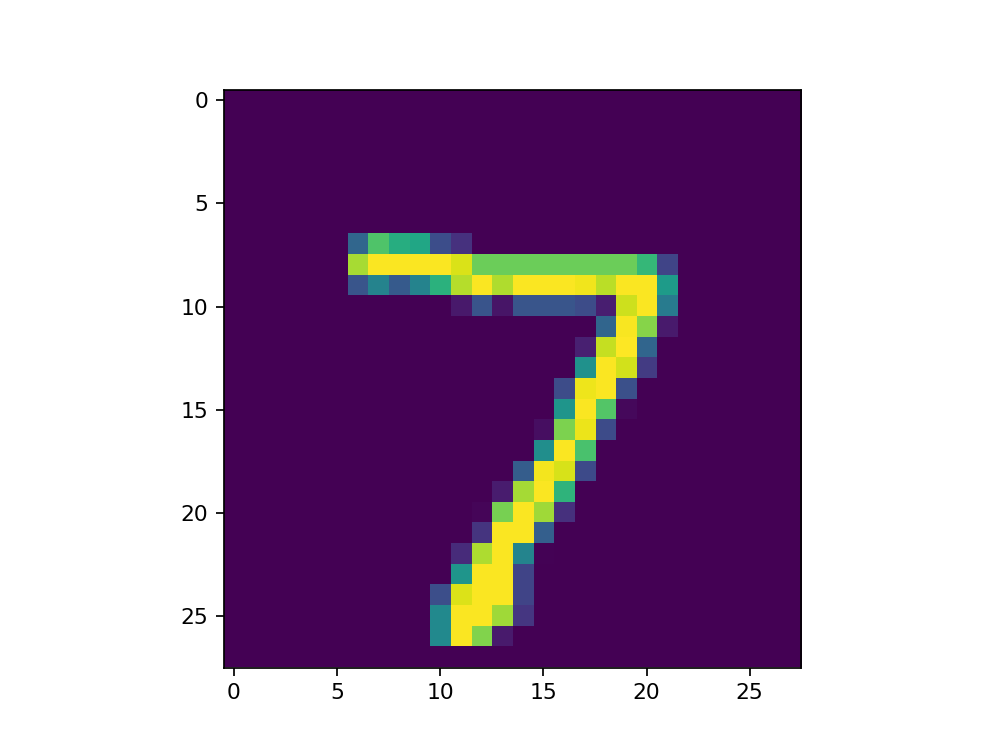


Ground-truth:  7

Predicted:  [6.724]


In [38]:
index=0 #index of a randomly picked sample to make a predcition inside the test set
plt.imshow(x_test[index,:,:,0])
y_test_i=y_test[index]
print("\nGround-truth: ",y_test_i)

y_pred_i=model4.predict(x_test)[index]
print("\nPredicted: ",np.around(y_pred_i,decimals=3))


# Next hands-on session: Transfer learning & fine-tuning 
## "Taking features learned on one problem, and leveraging them on a new, similar problem."

##  An end-to-end example: fine-tuning an image classification model

## Keras provides deep learning models that are made available alongside pre-trained weights
https://keras.io/api/applications/

## ResNet
https://arxiv.org/pdf/1512.03385.pdf
<img src="files/imgs/ResNet.png">


In [42]:
import tensorflow as tf

# Use a base model or backbone for feature extraction
base_model=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(112, 112, 3)
    )

# Create new model on top
inputs = keras.Input(shape=(112,112,3))
x = base_model(inputs)
#Add additional layers on top
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation="linear")(x)
model5 = keras.Model(inputs, outputs)
print(model5.summary())

# let's visualize layer names and layer indices
for i, layer in enumerate(model5.layers):
    print(i, layer.name)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 112, 112, 3)]     0         
_________________________________________________________________
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 32769     
Total params: 23,620,481
Trainable params: 23,567,361
Non-trainable params: 53,120
_________________________________________________________________
None
0 input_10
1 resnet50
2 flatten_7
3 dense_7


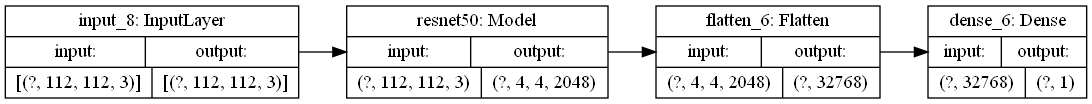

In [40]:
keras.utils.plot_model(model5,show_shapes=True,rankdir='LR',to_file="Transfer_learning_Model.png")